In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__


from numpy.random import seed
seed(1)

In [19]:
seed=20
tf.random.set_seed(seed)

dataset=pd.read_csv('stonks/ADANIPORTS.csv')

In [20]:
dataset.describe()

dataset.info()

dataset.isnull().count()

dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2585 entries, 0 to 2584
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2585 non-null   object 
 1   Open Price                 2585 non-null   float64
 2   High Price                 2585 non-null   float64
 3   Low Price                  2585 non-null   float64
 4   Close Price                2585 non-null   float64
 5   WAP                        2585 non-null   float64
 6   No.of Shares               2585 non-null   int64  
 7   No. of Trades              2585 non-null   int64  
 8   Total Turnover (Rs.)       2585 non-null   float64
 9   Deliverable Quantity       2584 non-null   float64
 10  % Deli. Qty to Traded Qty  2584 non-null   float64
 11  Spread High-Low            2585 non-null   float64
 12  Spread Close-Open          2585 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,9-June-2021,881.40,901.0,831.30,852.55,868.068924,1417148,31843,1.230182e+09,191869.0,13.54,69.70,-28.85
1,8-June-2021,887.65,887.7,859.25,874.05,875.465358,793172,16275,6.943946e+08,99676.0,12.57,28.45,-13.60
2,7-June-2021,838.00,898.8,836.00,878.50,877.215693,2122651,53035,1.862023e+09,467381.0,22.02,62.80,40.50
3,4-June-2021,831.90,842.0,823.00,834.05,832.978840,847609,20716,7.060404e+08,198139.0,23.38,19.00,2.15
4,3-June-2021,819.50,849.2,810.60,825.40,829.395433,1490283,35855,1.236034e+09,319627.0,21.45,38.60,5.90


In [21]:
print(dataset.tail())

                Date  Open Price  High Price  Low Price  Close Price  \
2580  7-January-2011      155.00      155.25     146.65       147.60   
2581  6-January-2011      159.00      159.90     153.50       154.65   
2582  5-January-2011      150.00      158.60     149.45       157.55   
2583  4-January-2011      146.00      150.00     144.05       148.25   
2584  3-January-2011      145.95      146.45     144.20       144.75   

             WAP  No.of Shares  No. of Trades  Total Turnover (Rs.)  \
2580  150.254998        224053           3181            33665083.0   
2581  157.003808        490608           5474            77027324.0   
2582  154.834965       1103066          11207           170793186.0   
2583  147.248980        196807           2016            28979630.0   
2584  145.186425         85627           1098            12431878.0   

      Deliverable Quantity  % Deli. Qty to Traded Qty  Spread High-Low  \
2580               69927.0                      31.21             

In [22]:
dataset.sort_values(by=['Date'])

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
2522,1-April-2011,136.90,141.80,136.90,140.75,140.311708,386849,4563,54279444.0,187925.0,48.58,4.90,3.85
2024,1-April-2013,140.00,143.80,137.75,142.20,141.380375,122679,2005,17344403.0,16067.0,13.10,6.05,2.20
1773,1-April-2014,188.65,189.40,184.30,186.00,186.721126,158631,2951,29619759.0,43160.0,27.21,5.10,-2.65
1530,1-April-2015,308.70,311.50,306.25,310.70,309.297549,87552,2576,27079619.0,18682.0,21.34,5.25,2.00
1283,1-April-2016,247.50,247.50,239.80,242.75,243.300541,136687,2851,33256021.0,36936.0,27.02,7.70,-4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,9-September-2014,301.80,301.80,293.95,295.10,296.753273,300008,5676,89028356.0,79213.0,26.40,7.85,-6.70
1419,9-September-2015,322.20,327.45,320.50,323.95,324.191741,172519,3379,55929235.0,39486.0,22.89,6.95,1.75
1174,9-September-2016,275.00,275.50,270.15,271.45,272.652845,445216,3558,121389409.0,45204.0,10.15,5.35,-3.55
434,9-September-2019,366.00,371.70,363.95,369.60,368.091783,78261,2577,28807231.0,19443.0,24.84,7.75,3.60


In [23]:
print(dataset.head())

          Date  Open Price  High Price  Low Price  Close Price         WAP  \
0  9-June-2021      881.40       901.0     831.30       852.55  868.068924   
1  8-June-2021      887.65       887.7     859.25       874.05  875.465358   
2  7-June-2021      838.00       898.8     836.00       878.50  877.215693   
3  4-June-2021      831.90       842.0     823.00       834.05  832.978840   
4  3-June-2021      819.50       849.2     810.60       825.40  829.395433   

   No.of Shares  No. of Trades  Total Turnover (Rs.)  Deliverable Quantity  \
0       1417148          31843          1.230182e+09              191869.0   
1        793172          16275          6.943946e+08               99676.0   
2       2122651          53035          1.862023e+09              467381.0   
3        847609          20716          7.060404e+08              198139.0   
4       1490283          35855          1.236034e+09              319627.0   

   % Deli. Qty to Traded Qty  Spread High-Low  Spread Close-Op

In [24]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

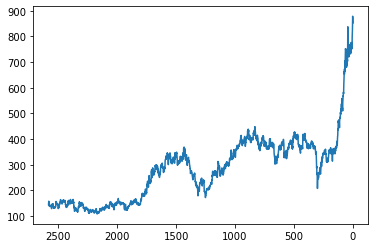

In [30]:
plt.gca().invert_xaxis()
dataset['Close Price'].plot()

In [26]:
plt.show()

In [35]:
X=dataset.reindex(columns=['Open Price','High Price','Low Price']).values
y=dataset.reindex(columns=['Close Price']).values



In [37]:
print(X,y)

[[881.4  901.   831.3 ]
 [887.65 887.7  859.25]
 [838.   898.8  836.  ]
 ...
 [150.   158.6  149.45]
 [146.   150.   144.05]
 [145.95 146.45 144.2 ]] [[852.55]
 [874.05]
 [878.5 ]
 ...
 [157.55]
 [148.25]
 [144.75]]


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
ann = tf.keras.models.Sequential()

In [41]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))


In [42]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))


In [43]:
ann.add(tf.keras.layers.Dense(units=1))


In [44]:
ann.compile(optimizer = 'adam', loss = 'mse')


In [45]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)


Epoch 1/100
65/65 [==============================] - 0s 867us/step - loss: 99480.6250
Epoch 2/100
65/65 [==============================] - 0s 844us/step - loss: 98942.9375
Epoch 3/100
65/65 [==============================] - 0s 884us/step - loss: 98249.0156
Epoch 4/100
65/65 [==============================] - 0s 875us/step - loss: 96975.3828
Epoch 5/100
65/65 [==============================] - 0s 982us/step - loss: 94865.3359
Epoch 6/100
65/65 [==============================] - 0s 920us/step - loss: 91682.7578
Epoch 7/100
65/65 [==============================] - 0s 916us/step - loss: 87212.4062
Epoch 8/100
65/65 [==============================] - 0s 887us/step - loss: 81471.4141
Epoch 9/100
65/65 [==============================] - 0s 942us/step - loss: 74509.7656
Epoch 10/100
65/65 [==============================] - 0s 905us/step - loss: 66592.3828
Epoch 11/100
65/65 [==============================] - 0s 881us/step - loss: 58026.4844
Epoch 12/100
65/65 [==============================] 

65/65 [==============================] - 0s 891us/step - loss: 24.3583
Epoch 98/100
65/65 [==============================] - 0s 982us/step - loss: 24.1615
Epoch 99/100
65/65 [==============================] - 0s 951us/step - loss: 24.1173
Epoch 100/100
65/65 [==============================] - 0s 936us/step - loss: 23.8104


In [46]:
y_pred = ann.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[152.27145386 148.1       ]
 [123.40180969 120.6       ]
 [139.65327454 138.45      ]
 ...
 [445.50405884 453.7       ]
 [384.93377686 388.        ]
 [271.37600708 273.75      ]]


In [47]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.9987406606609852


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


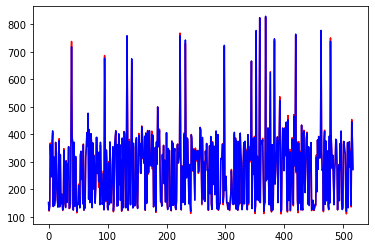

In [50]:
ann.summary()
#plt.plot(sc.inverse_transform(X_train))
plt.plot(y_test, color='r')
plt.plot(y_pred, color='b')
plt.show()

In [51]:
print(ann.predict(sc.transform([[100,200,300]])))

[[186.10098]]
